# Double Pendulum

Numerically solve the double pendulum using constant acceleration approximation.

Computes angular dispacement, angular velocities, and trajectory of a double pendulum given initial conditions.

### Background

The Lagrangian of this system is

$$ L = \frac{1}{2}(m_1+m_2)(L_1\dot{\phi_1})^2 + \frac{1}{2}m_2L_2\dot{\phi_2})^2+m_2L_1L_2\dot{\phi_1}\dot{\phi_2}\cos(\phi_1-\phi_2)+(m_1+m_2)gL_1\cos\phi_1+m_2gL_2\cos\phi_2 $$

The equations of motion are found from the Euler-Lagrange equation:

$$ \ddot{\phi_1} = \frac{-m_2L_1\dot{\phi_1}^2\sin(\phi_1-\phi_2)\cos(\phi_1-\phi_2)+ m_2g\sin\phi_2\cos(\phi_1-\phi_2)-m_2L_2\dot{\phi_2}^2\sin(\phi_1-\phi_2)-(m_1+m_2)g\sin\phi_2}{L_1[m_1+m_2+m_2\cos^2(\phi_1-\phi_2)]}$$
$$\ddot{\phi_2} = \frac{-m_2L_1\dot{\phi_1}^2\sin(\phi_1-\phi_2)+ m_2g\sin\phi_2-m_2L_1\ddot{\phi_1}\cos(\phi_1-\phi_2)}{m_2L_2}$$

### INPUT: Initial Conditions

Input initial conditions (position/velocity coordinates) into appropriate spaces below:

In [32]:
# Mass 1 initial conditions (Rad and Rad/s)
init_pos1 = 2
init_vel1 = 0

# Mass 2 initial conditions (Rad and Rad/s)
init_pos2 = 3.141
init_vel2 = 0

# System Specifications
m1 = 1 
m2 = 1
L1 = 1
L2 = 1

# Simulation Time (s)
endTime = 10

### Dependency Declarations

In [33]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

### Function Definitions

In [34]:
def compStep(coords, dt):
    # Updates coordinates given current coordinates
    # coords = [x, v, a], dt = small time interval
    coords[0] = coords[0] + (coords[1] * dt) + (coords[2] * dt * dt / 2)
    coords[1] = coords[1] + (coords[2] * dt)
    return coords;

def updateCds(cds1, cds2, m, l):
    # Updates coordinates of system for coupled pendulum
    # cds = [x, v, a], m = [m1 m2], l = [l1 l2]
    
    g = 9.81
    
    sindif = np.sin(cds1[0] - cds2[0])
    cosdif = np.cos(cds1[0] - cds2[0])
    
    m1 = m[0]
    m2 = m[1]
    L1 = l[0]
    L2 = l[1]
    
    num = -m2*L1*cds1[1]*cds1[1]*sindif*cosdif
    num = num + m2*g*np.sin(cds2[0])*cosdif
    num = num - m2*L2*cds2[1]*cds2[1]*sindif
    num = num - (m1+m2)*g*np.sin(cds1[0])
    den = (m1 + m2 - m2*cosdif*cosdif) * L1
    
    cds1[2] = num / den
    
    num = m2*L1*cds1[1]*cds1[1]*sindif
    num = num - m2*g*np.sin(cds2[0])
    num = num - m2*L1*cosdif*cds1[2]
    den = m2*L2
    
    cds2[2] = num / den
    
    return cds1, cds2    

def compPos(cds1, cds2, l):
    # Updates position (x,y) coordinates of masses m1 and m2
    R1 = [np.sin(cds1[0])*l[0], -np.cos(cds1[0])*l[0]]
    R2 = [np.sin(cds1[0])*l[0]+np.sin(cds2[0])*l[1],-np.cos(cds1[0])*l[0]-np.cos(cds2[0])*l[1]]
    return R1, R2

### Driver

In [35]:
time = [0]
dt = 0.001

coord1 = [init_pos1, init_vel1, 0]
coord2 = [init_pos2, init_vel2, 0]
m = [m1, m2]
l = [L1, L2]

coord1, coord2 = updateCds(coord1, coord2, m, l)
r1, r2 = compPos(coord1, coord2, l)
R1 = [[r1[0]], [r1[1]]]
R2 = [[r2[0]], [r2[1]]]

x1 = [init_pos1]
x2 = [init_pos2]

v1 = [init_vel1]
v2 = [init_vel2]

while(time[-1] < endTime):
    coord1 = compStep(coord1, dt)
    coord2 = compStep(coord2, dt)
    x1.append(coord1[0])
    x2.append(coord2[0])
    v1.append(coord1[1])
    v2.append(coord2[1])
    
    r1, r2 = compPos(coord1, coord2, l)
    R1[0].append(r1[0])
    R1[1].append(r1[1])
    R2[0].append(r2[0])
    R2[1].append(r2[1])
    
    coord1, coord2 = updateCds(coord1, coord2, m, l)
    
    time.append(time[-1]+dt)

### Plot Output

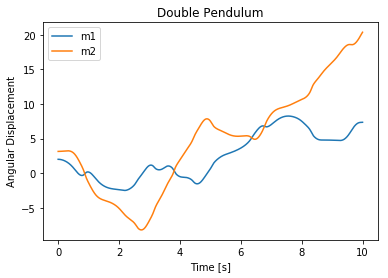

In [36]:
    plt.figure()
    plt.plot(time, x1, label="m1")
    plt.plot(time, x2, label="m2")
    plt.title('Double Pendulum')
    plt.xlabel('Time [s]')
    plt.ylabel('Angular Displacement')
    plt.legend()

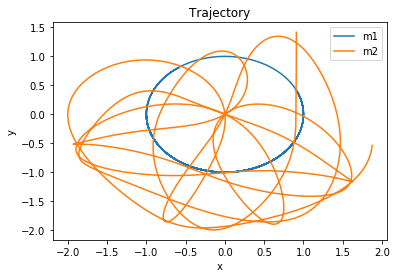

In [37]:
    plt.figure()
    plt.plot(R1[0], R1[1], label="m1")
    plt.plot(R2[0], R2[1], label="m2")
    plt.title('Trajectory')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

### Animated Plot

After: https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

It may take a while to finish running. Shows the motion of the pendulum, red and green lengths gives the arms whilst the blue and orange lines gives the trajectories (there is a trace that holds for a few frames to give a sense of motion).

NOTE: The animation is NOT in real time, but will be dependent on the time simulated

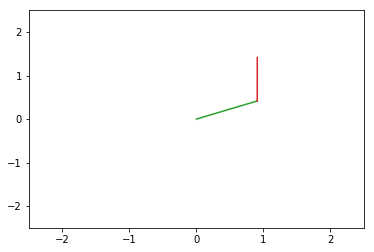

In [38]:
fig, ax = plt.subplots()
L = L1 + L2 + 0.5
ax.axis([-L,L,-L,L])
l1, = ax.plot([],[])
l2, = ax.plot([],[])
l3, = ax.plot([],[])
l4, = ax.plot([],[])

def animate(i):
    a = np.floor(np.linspace(0, len(R1[0])-1, 100))
    b = []
    for elm in a:
        elm = int(elm)
        b.append(elm)
    l1.set_data(R1[0][b[i-5]:b[i]], R1[1][b[i-5]:b[i]])
    l2.set_data(R2[0][b[i-5]:b[i]], R2[1][b[i-5]:b[i]])
    l3.set_data([0,R1[0][b[i]]], [0,R1[1][b[i]]])
    l4.set_data([R1[0][b[i]],R2[0][b[i]]], [R1[1][b[i]],R2[1][b[i]]])

ani = animation.FuncAnimation(fig, animate, frames=100)

HTML(ani.to_jshtml())